In [60]:
import os
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

INSTANCES = 1
MIN_SIZE = 8
SIZES = 5

class Symmetry(Enum):
    SYMMETRIC = "Symetryczne"
    ASYMMETRIC = "Asymetryczne"

class Sizes(Enum):
    S99 = "99"
    S152 = "152"
    S225 = "225"
    S264 = "264"
    A33 = "33"
    A64 = "64"
    A100 = "100"
    A170 = "170"
    

In [61]:
#Find all files in dir_path directory
dir_path = "../build/Wyniki"

file_list = os.listdir(dir_path)
print(file_list)

['TsInsert.csv', 'TsNN.csv', 'TsRandom.csv', 'TsSwap.csv', 'TsTabuLen.csv']


In [62]:
#Read data from all .csv
data_frames = {}
for file_name in file_list:
    file_path = "../build/Wyniki/"+file_name
    data_frame = pd.read_csv(file_path)
    data_frame["Blad wzgledny (procentowo)"] = data_frame["Blad wzgledny (procentowo)"].str.rstrip('%').astype(float) 
    data_frame = data_frame[pd.to_numeric(data_frame.iloc[:, 0], errors='coerce').notna()]
    data_frames[file_name] = data_frame
    print(pd.to_numeric(data_frame.iloc[:, 0], errors='coerce'))
    print(file_name)
    print(data_frame)


1       1211
2       1211
3       1211
4       1211
6      73682
7      73682
8      73682
9      73682
11    126643
12    126643
13    126643
14    126643
16     49135
17     49135
18     49135
19     49135
21      1286
22      1286
23      1286
24      1286
26      1839
27      1839
28      1839
29      1839
31     36230
32     36230
33     36230
34     36230
Name: Optymalny wynik, dtype: int64
TsInsert.csv
   Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1             1211          1425.00            0.50   
2             1211          1425.00            0.50   
3             1211          1425.00            0.50   
4             1211          1428.00            0.50   
6            73682         79439.00            0.50   
7            73682         79459.00            0.50   
8            73682         79257.00            0.50   
9            73682         79532.00            0.50   
11          126643        140193.00            0.50   
12          126643        140007.00  

In [63]:
#Genrate base table and column list
columns = pd.MultiIndex.from_tuples(
    [
        ("","Rozmiar[Liczba wierzchołków]"),
        (Symmetry.SYMMETRIC.value, Sizes.S99.value),
        (Symmetry.SYMMETRIC.value, Sizes.S152.value),
        (Symmetry.SYMMETRIC.value, Sizes.S225.value),
        (Symmetry.SYMMETRIC.value, Sizes.S264.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
        (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
    ],
    )
base_table = pd.DataFrame(columns=columns)
column_list = [
    (Symmetry.SYMMETRIC.value, Sizes.S99.value),
    (Symmetry.SYMMETRIC.value, Sizes.S152.value),
    (Symmetry.SYMMETRIC.value, Sizes.S225.value),
    (Symmetry.SYMMETRIC.value, Sizes.S264.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A33.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A64.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A100.value),
    (Symmetry.ASYMMETRIC.value, Sizes.A170.value)
]
print(base_table.columns)

MultiIndex([(            '', 'Rozmiar[Liczba wierzchołków]'),
            ( 'Symetryczne',                           '99'),
            ( 'Symetryczne',                          '152'),
            ( 'Symetryczne',                          '225'),
            ( 'Symetryczne',                          '264'),
            ('Asymetryczne',                           '33'),
            ('Asymetryczne',                           '64'),
            ('Asymetryczne',                          '100'),
            ('Asymetryczne',                          '170')],
           )


In [69]:
def save_to_latex(saved_table,file_name,caption,label):
    f = open("./src/tables/"+file_name, "w",encoding="utf-8")
    latex_output = saved_table.to_latex(  index=False,
                                    column_format="|r|r|r|r|r|r|r|r|r|",
                                    caption=caption,
                                    label="tab:"+label,
                                    multicolumn_format="|c|",
                                    float_format="%.2f")
    latex_output = latex_output.replace("\begin{table}", r"\begin{table}[ht]")
    latex_output = latex_output.replace("{Asymetryczne} \\",r"{Asymetryczne} \\ \hline")
    latex_output = latex_output.replace("\\toprule", r"\hline")
    latex_output = latex_output.replace("\n\\midrule", r" \hline")
    latex_output = latex_output.replace("\n\\bottomrule", r" \hline")
    latex_output = latex_output.replace("Rozmiar Instancji/\n","Rozmiar Instancji/\\linebreak")
    latex_output = latex_output.replace("\\begin{tabular}{|r|r|r|r|r|r|r|r|}\n","\\centering\n\\begin{tabular}{|r|r|r|r|r|r|r|r|}\n")
    latex_output = latex_output.replace("\\caption{"+caption+"}\n","")
    latex_output = latex_output.replace("\\label{tab:"+label+"}\n","")
    latex_output = latex_output.replace("\\end{tabular}","\\end{tabular}\n\\caption{"+caption+"}\n"+"\\label{tab:"+label+"}")
    latex_output = latex_output.replace("%", r"\%")
    f.write(latex_output)
    f.close()

In [67]:
def createPlot(data_frame,file_name,labels):
    file_name = file_name.replace(".csv", "")
    tsp_index_table = [99,152,225,264]
    atsp_index_table = [33,64,100,170]
    num_rows = len(data_frame)
    colors = ['blue', 'green', 'orange', 'purple', 'cyan'][:num_rows] 
    tsp_labels = labels
    plt.figure(figsize=(10, 6))
    for i in range(0,4):
        tsp_data = data_frame.iloc[i:i+1,1:5].values.flatten()
        plt.plot(tsp_index_table,tsp_data,label= tsp_labels[i], marker='o',color = colors[i])
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(tsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(0,4):
        atsp_data = data_frame.iloc[i:i+1,5:9].values.flatten()
        plt.plot(atsp_index_table,atsp_data, label="Asymetryczne", marker='o',color='red')
    plt.ylabel("Blad wzgledny [%]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji [Liczba wierzchołków]")
    plt.xticks(atsp_index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/"+"asym"+file_name+".png")
    plt.show()

TsInsert.csv
28
   Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1             1211          1425.00            0.50   
2             1211          1425.00            0.50   
3             1211          1425.00            0.50   
4             1211          1428.00            0.50   
6            73682         79439.00            0.50   
7            73682         79459.00            0.50   
8            73682         79257.00            0.50   
9            73682         79532.00            0.50   
11          126643        140193.00            0.50   
12          126643        140007.00            0.50   
13          126643        140193.00            0.50   
14          126643        140193.00            0.50   
16           49135         53962.00            0.50   
17           49135         53844.00            0.50   
18           49135         53883.00            0.50   
19           49135         53844.00            0.50   
21            1286          1483.00            0.

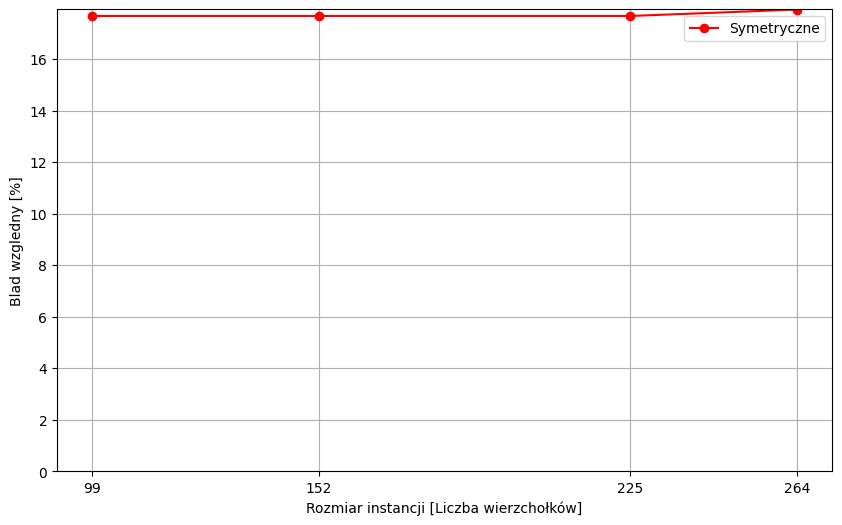

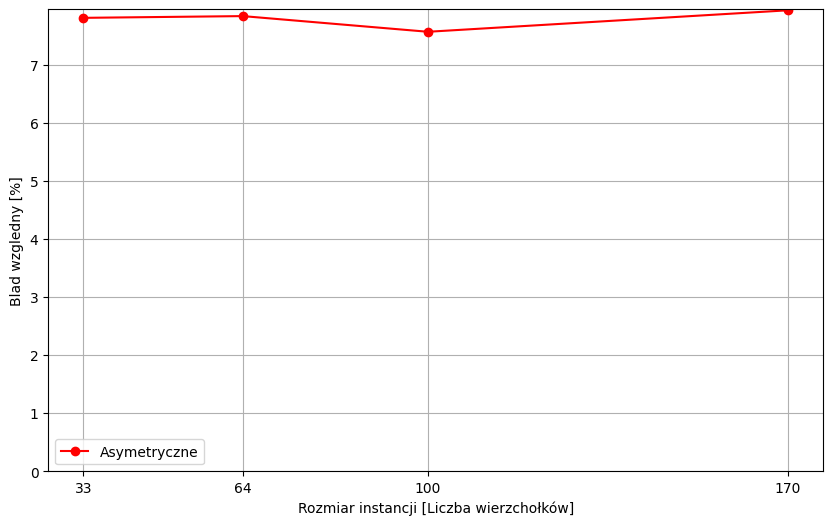

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.67 17.67 17.67 17.92         7.81 7.84 7.57 7.94
Error Table for TsInsert.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       10.70 10.55 10.70 10.70         9.82   

                  
    64  100  170  
0 9.58 9.66 9.58  
[10.7 10.55 10.7 10.7]
[9.82 9.58 9.66 9.58]


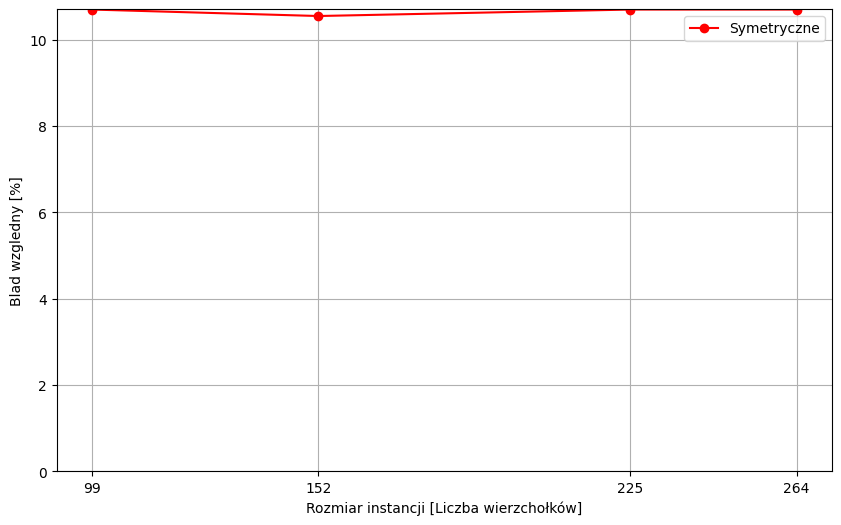

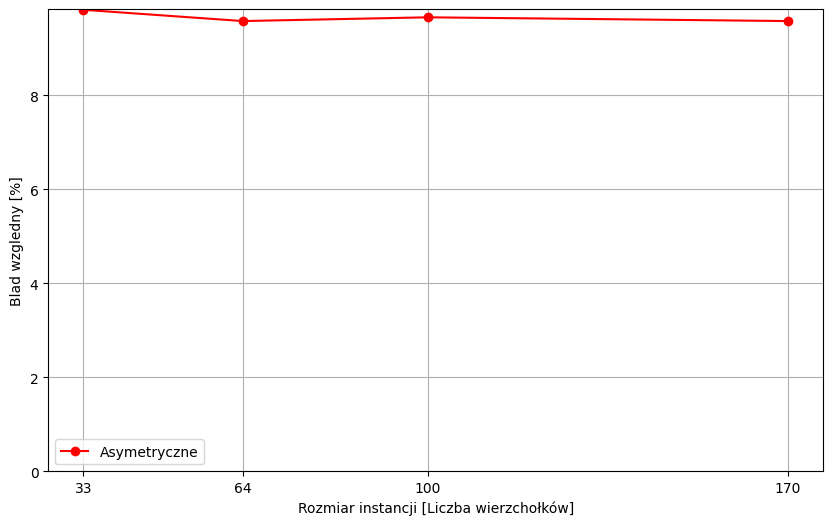

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       10.70 10.55 10.70 10.70         9.82 9.58 9.66 9.58
Error Table for TsInsert.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       15.32 16.95 17.42 13.84        18.27   

                     
     64   100   170  
0 18.76 18.65 18.76  
[15.32 16.95 17.42 13.84]
[18.27 18.76 18.65 18.76]


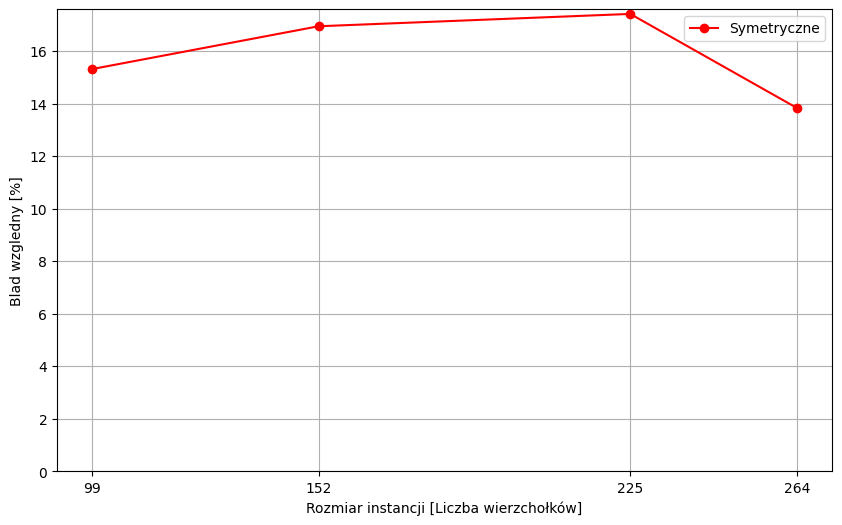

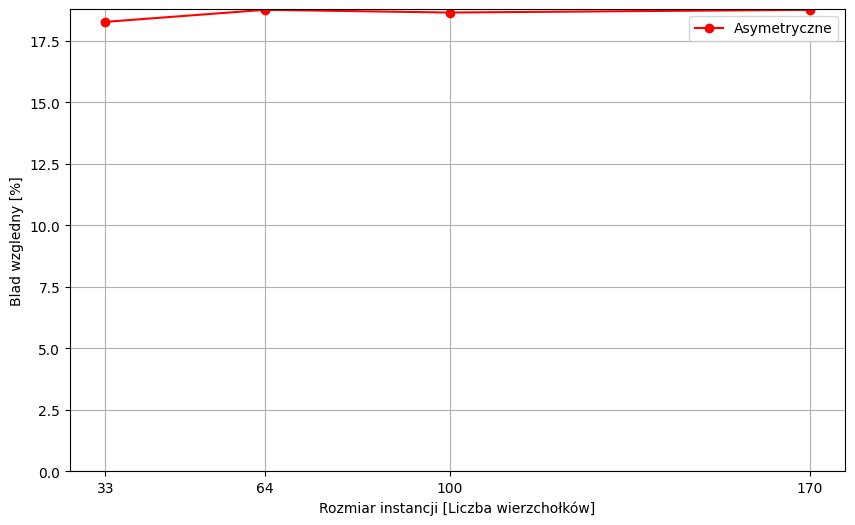

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       15.32 16.95 17.42 13.84        18.27 18.76 18.65 18.76
TsNN.csv
28
   Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1             1211          1425.00            0.50   
2             1211          1425.00            0.50   
3             1211          1425.00            0.50   
4             1211          1425.00            0.50   
6            73682         79395.00            0.50   
7            73682         79395.00            0.50   
8            73682         79395.00            0.50   
9            73682         79395.00            0.50   
11          126643        140486.00            0.50   
12          126643        140486.00            0.50   
13          126643        140486.00            0.50   
14          126643        140486.00            0.50   
16 

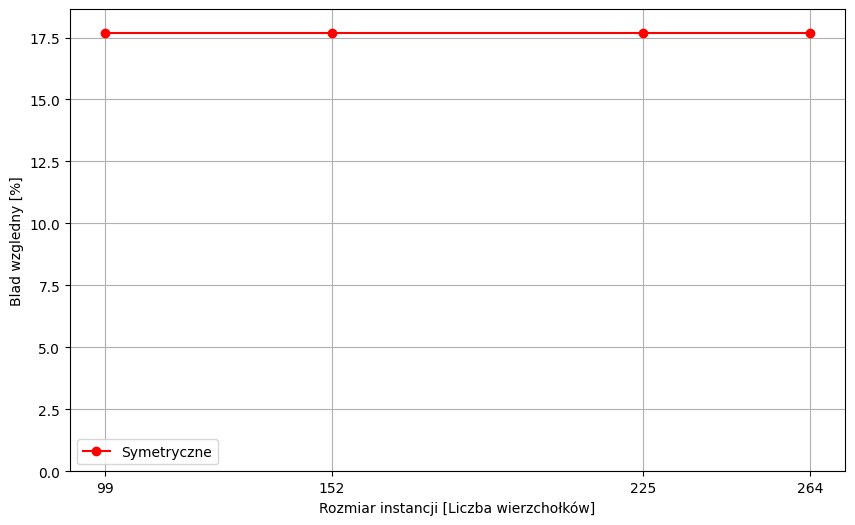

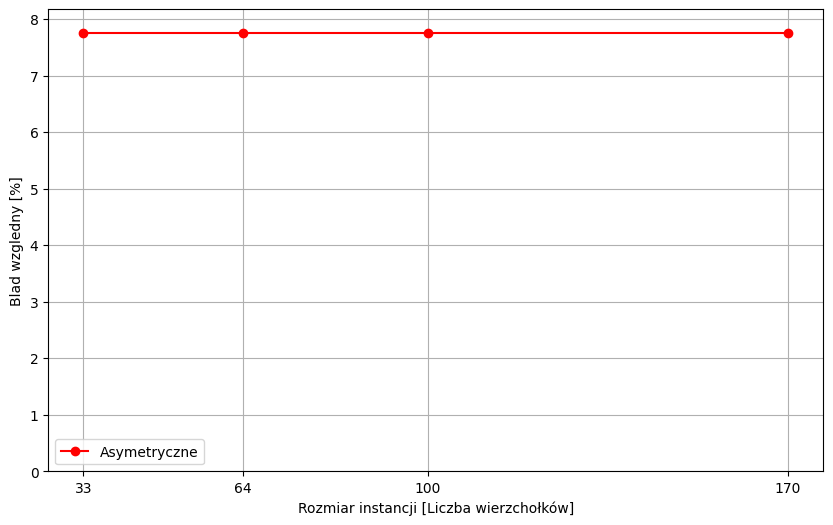

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.67 17.67 17.67 17.67         7.75 7.75 7.75 7.75
Error Table for TsNN.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       10.93 10.93 10.93 10.93        10.71   

                     
     64   100   170  
0 10.71 10.71 10.71  
[10.93 10.93 10.93 10.93]
[10.71 10.71 10.71 10.71]


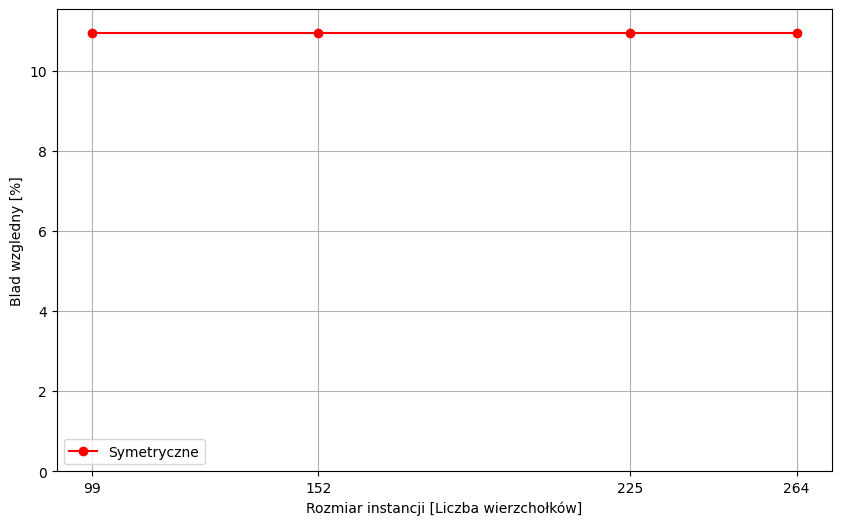

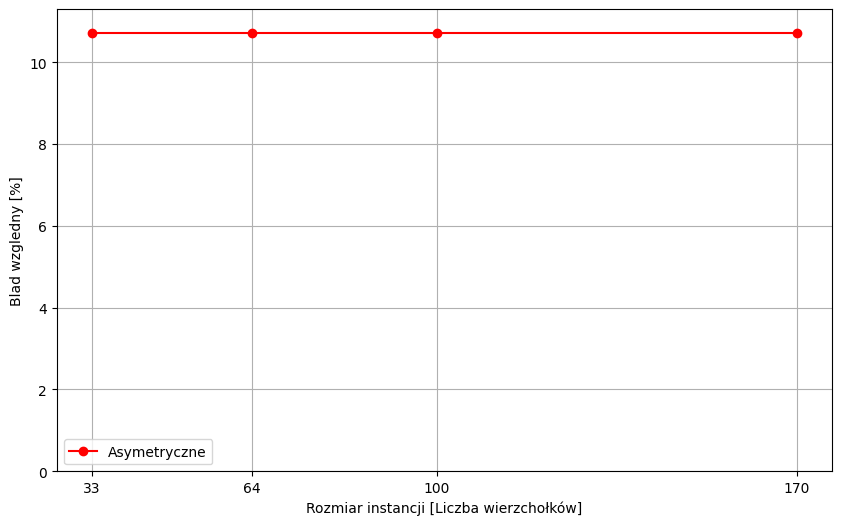

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       10.93 10.93 10.93 10.93        10.71 10.71 10.71 10.71
Error Table for TsNN.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       16.95 16.95 16.95 16.95        18.76   

                     
     64   100   170  
0 18.76 18.76 18.76  
[16.95 16.95 16.95 16.95]
[18.76 18.76 18.76 18.76]


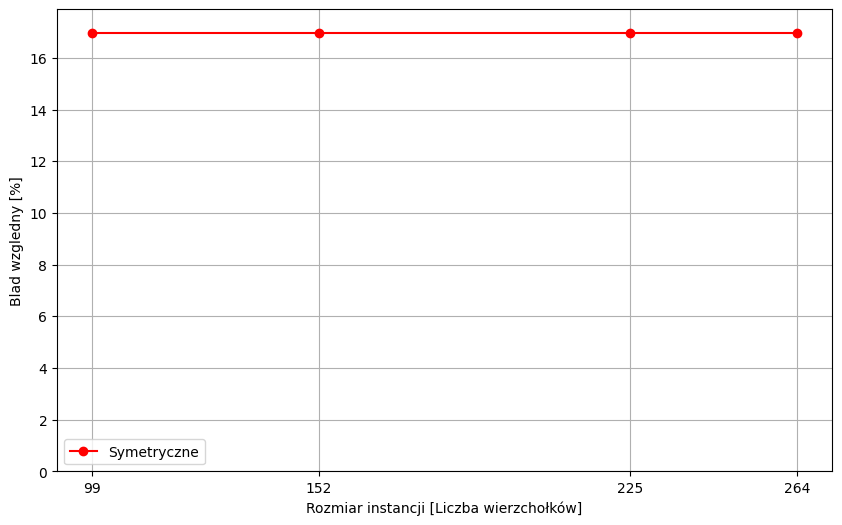

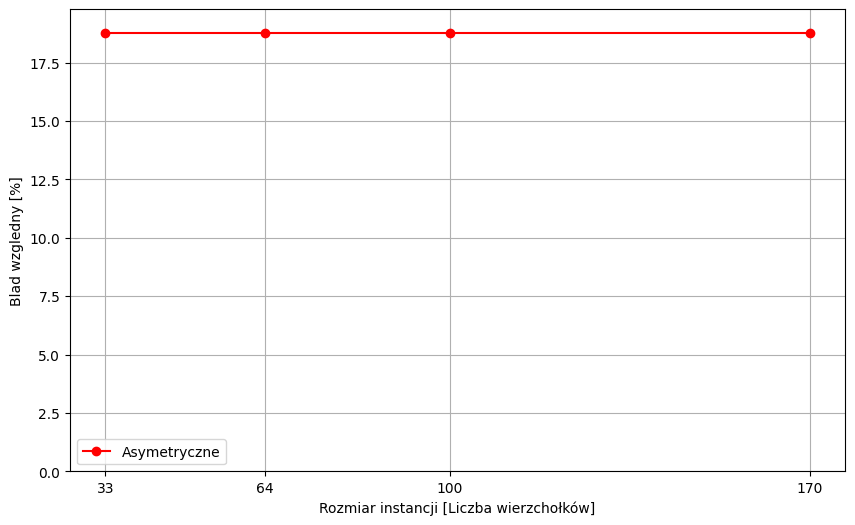

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       16.95 16.95 16.95 16.95        18.76 18.76 18.76 18.76
TsRandom.csv
28
   Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1             1211          6610.00            0.50   
2             1211          6596.00            0.50   
3             1211          6411.00            0.50   
4             1211          6358.00            0.50   
6            73682        892036.00            0.50   
7            73682        890054.00            0.50   
8            73682        892189.00            0.50   
9            73682        901512.00            0.50   
11          126643       1418987.00            0.50   
12          126643       1420938.00            0.50   
13          126643       1460458.00            0.50   
14          126643       1444218.00            0.50   

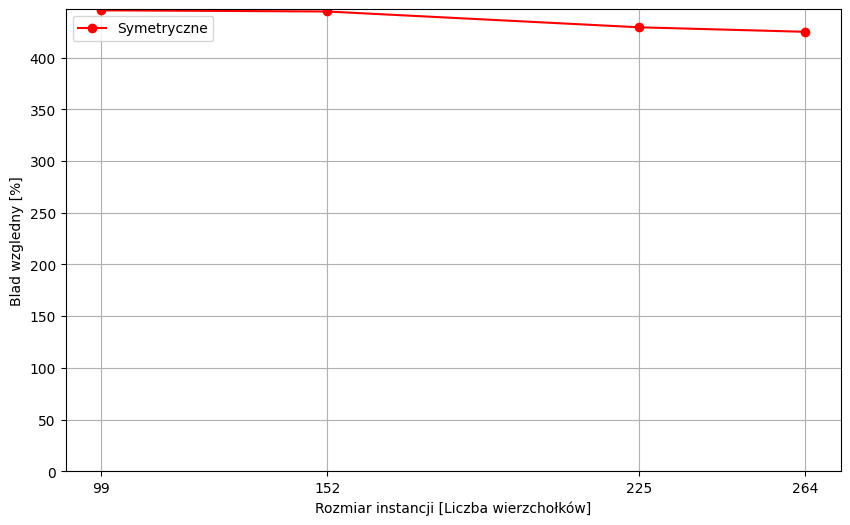

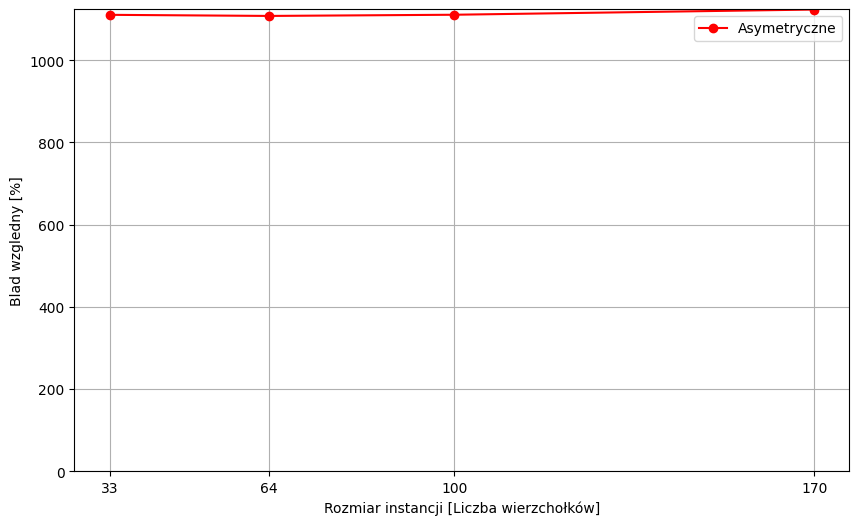

                             Symetryczne                      Asymetryczne                        
Rozmiar[Liczba wierzchołków]          99    152    225    264           33      64     100     170
            Błąd wzgledny[%]      445.83 444.67 429.40 425.02      1110.66 1107.97 1110.86 1123.52
Error Table for TsRandom.csv:
                               Symetryczne                          \
  Rozmiar[Liczba wierzchołków]          99     152     225     264   
0             Błąd wzgledny[%]     1020.46 1022.00 1053.21 1040.39   

  Asymetryczne                          
            33      64     100     170  
0      1898.92 1948.89 1905.12 1932.36  
[1020.46 1022.0 1053.21 1040.39]
[1898.92 1948.89 1905.12 1932.36]


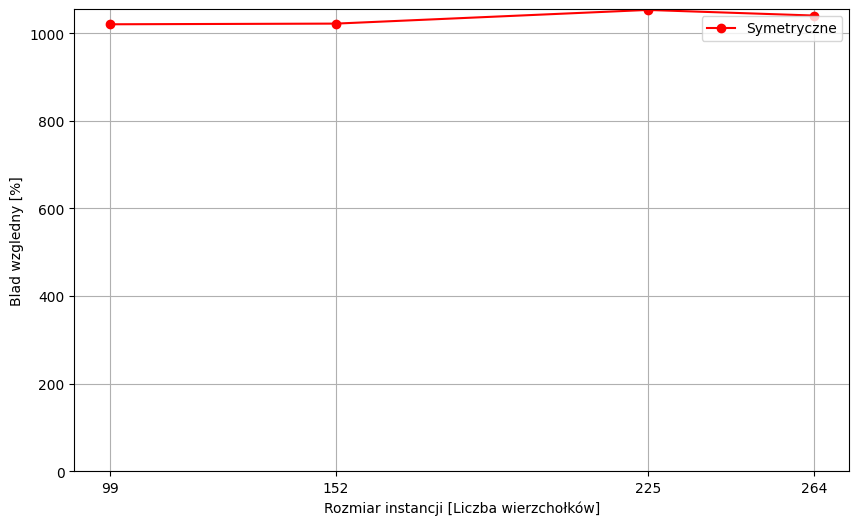

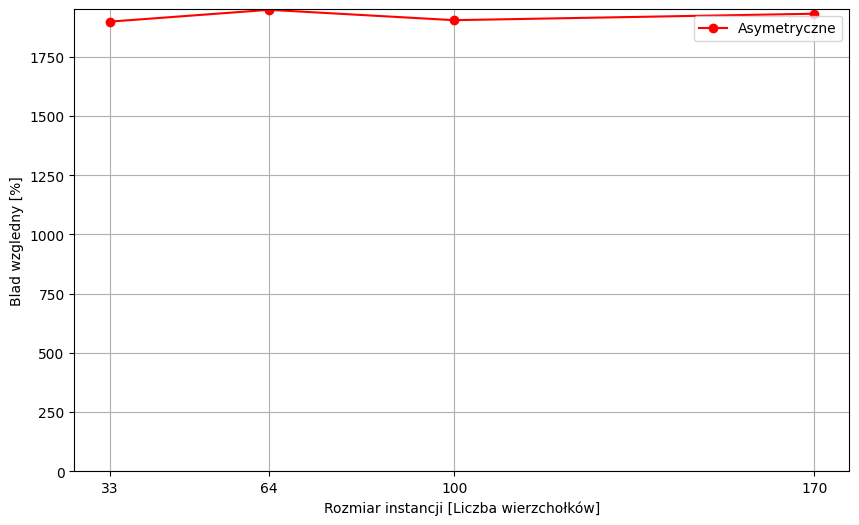

                             Symetryczne                         Asymetryczne                        
Rozmiar[Liczba wierzchołków]          99     152     225     264           33      64     100     170
            Błąd wzgledny[%]     1020.46 1022.00 1053.21 1040.39      1898.92 1948.89 1905.12 1932.36
Error Table for TsRandom.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       81.49 86.24 87.33 74.57       245.68   

                        
      64    100    170  
0 261.12 260.20 258.13  
[81.49 86.24 87.33 74.57]
[245.68 261.12 260.2 258.13]


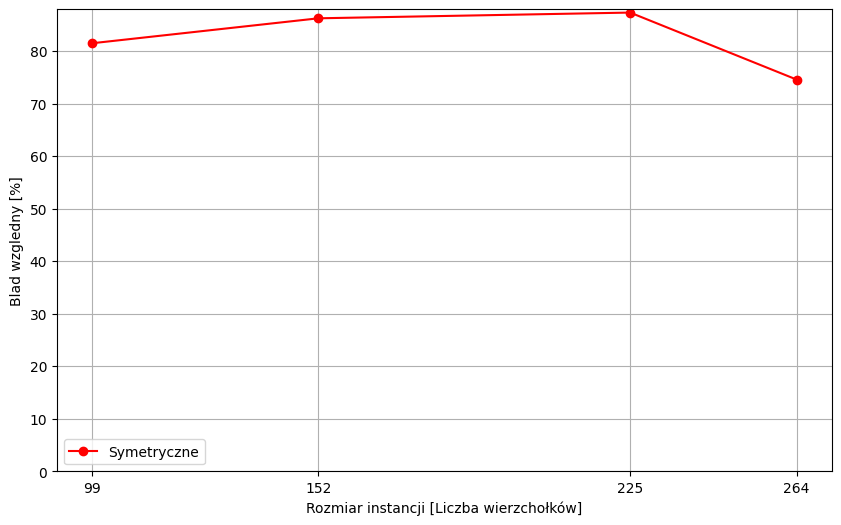

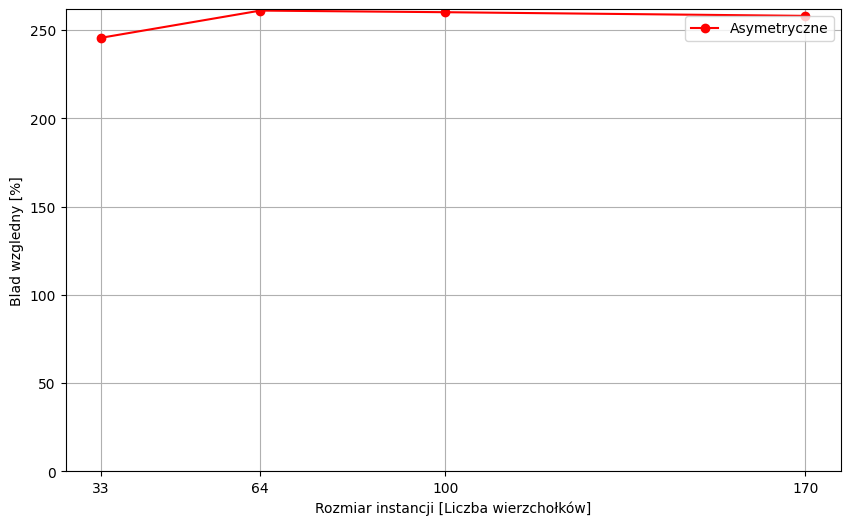

                             Symetryczne                   Asymetryczne                     
Rozmiar[Liczba wierzchołków]          99   152   225   264           33     64    100    170
            Błąd wzgledny[%]       81.49 86.24 87.33 74.57       245.68 261.12 260.20 258.13
TsSwap.csv
28
   Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1             1211          1425.00            0.50   
2             1211          1425.00            0.50   
3             1211          1425.00            0.50   
4             1211          1425.00            0.50   
6            73682         79395.00            0.50   
7            73682         79395.00            0.50   
8            73682         79395.00            0.50   
9            73682         79395.00            0.50   
11          126643        140486.00            0.50   
12          126643        140486.00            0.50   
13          126643        140486.00            0.50   
14          126643        140486.00            

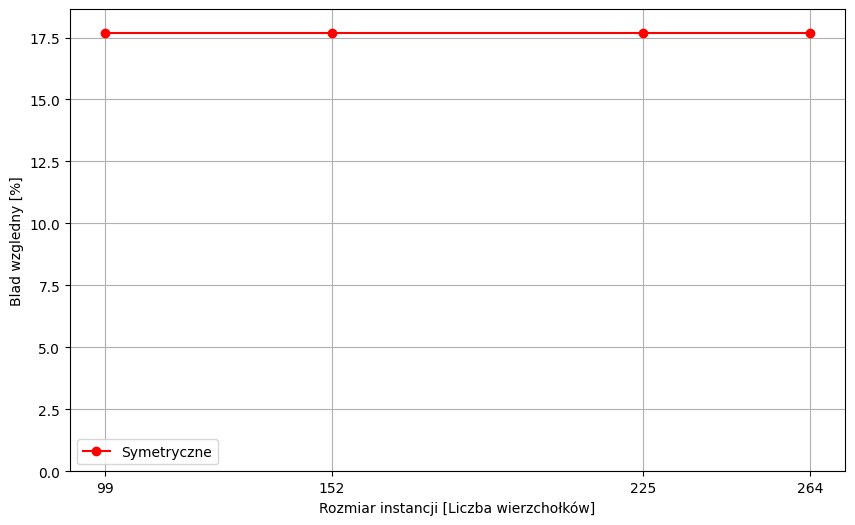

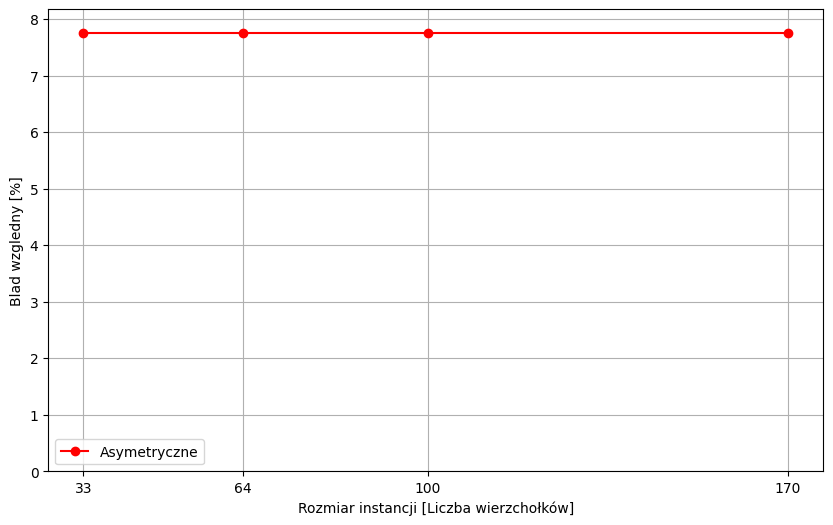

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.67 17.67 17.67 17.67         7.75 7.75 7.75 7.75
Error Table for TsSwap.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       10.93 10.93 10.93 10.93        10.71   

                     
     64   100   170  
0 10.71 10.71 10.71  
[10.93 10.93 10.93 10.93]
[10.71 10.71 10.71 10.71]


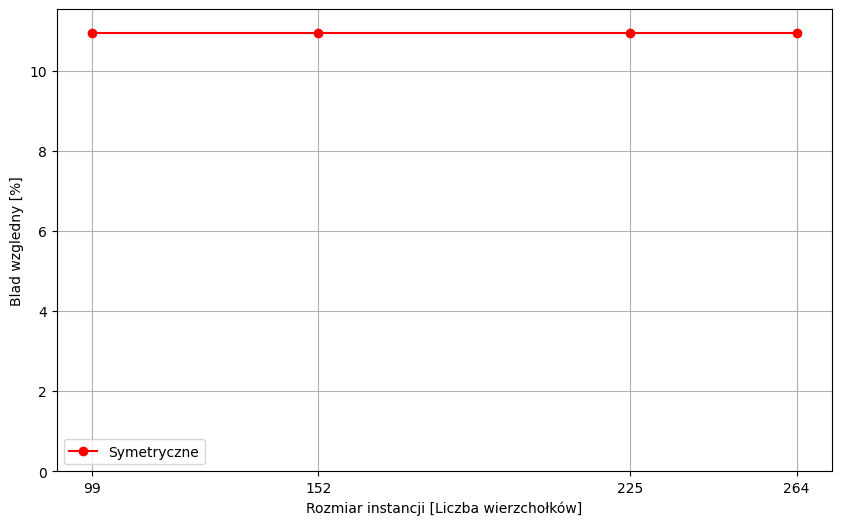

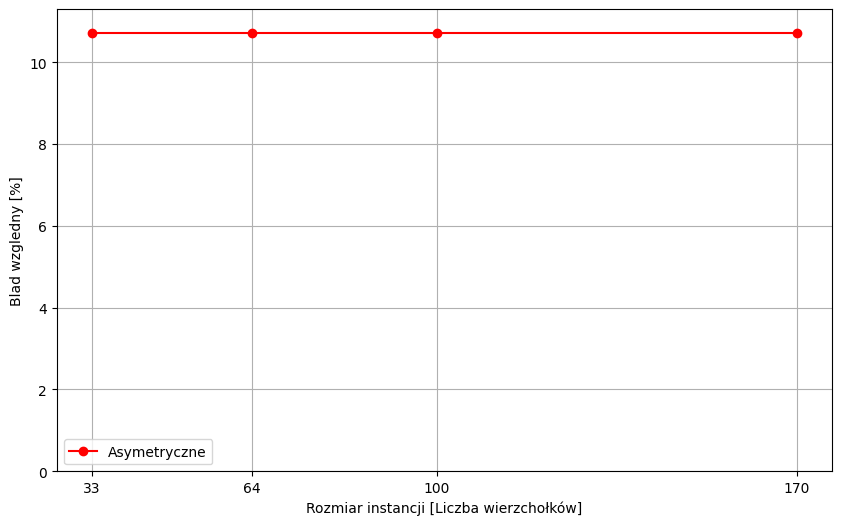

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       10.93 10.93 10.93 10.93        10.71 10.71 10.71 10.71
Error Table for TsSwap.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       16.95 16.95 16.95 16.95        18.76   

                     
     64   100   170  
0 18.76 18.76 18.76  
[16.95 16.95 16.95 16.95]
[18.76 18.76 18.76 18.76]


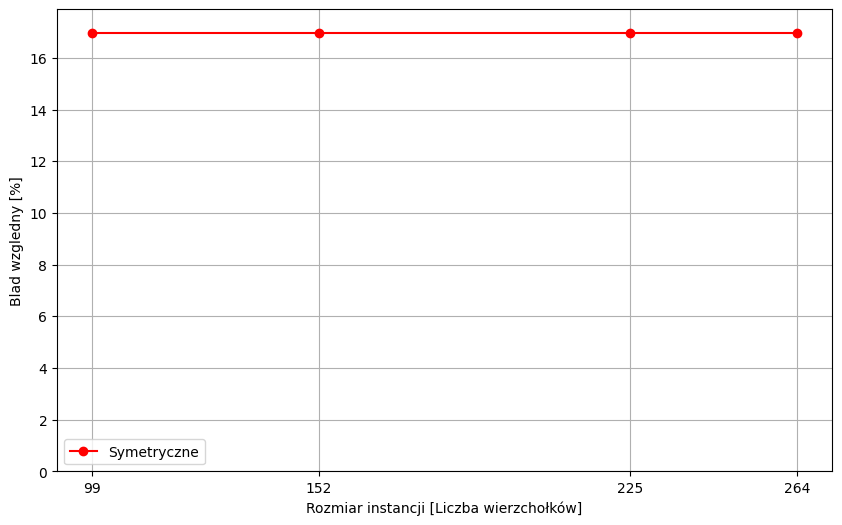

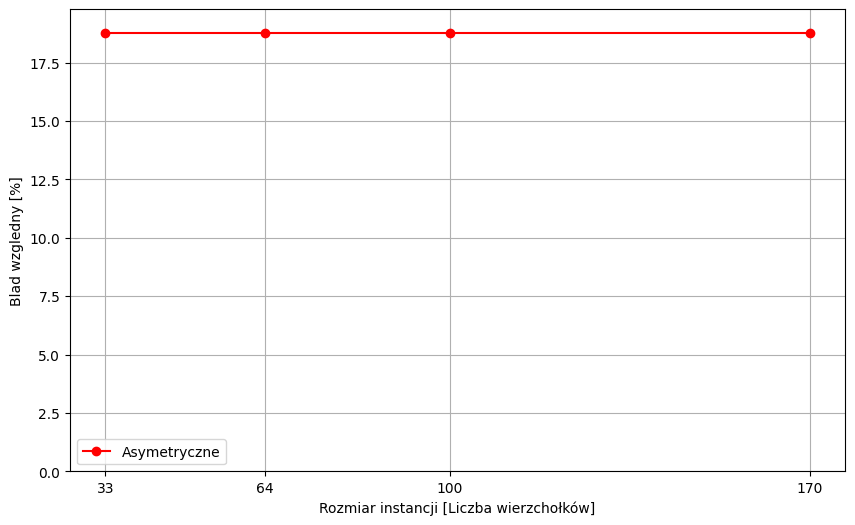

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       16.95 16.95 16.95 16.95        18.76 18.76 18.76 18.76
TsTabuLen.csv
122
    Optymalny wynik  Otrzymany wynik  Czas wykonania  \
1              1211          1425.00            0.50   
2              1211          1431.00            0.50   
3              1211          1431.00            0.50   
4              1211          1431.00            0.50   
6             73682         79257.00            0.50   
..              ...              ...             ...   
147           73682         79295.00            0.50   
148           73682         79132.00            0.50   
149           73682         79257.00            0.50   
151          126643        140193.00            0.50   
152          126643        140193.00            0.50   

     Blad wzgledny (procentowo)  
1    

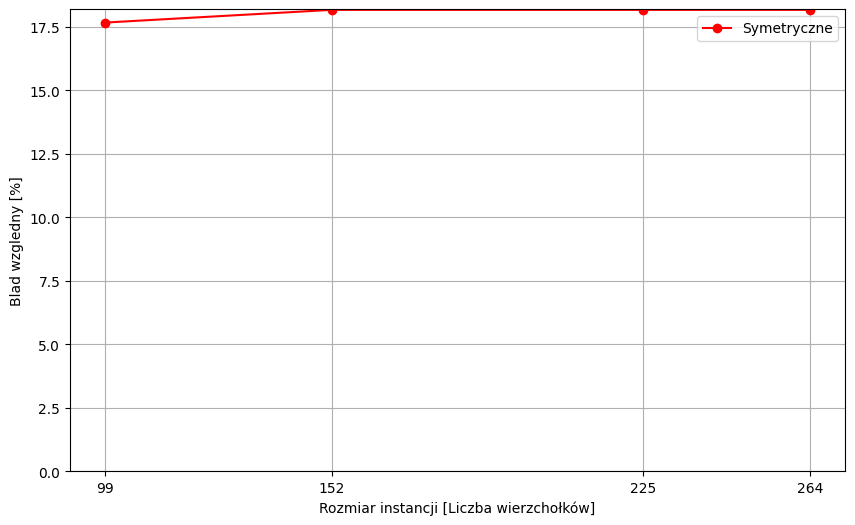

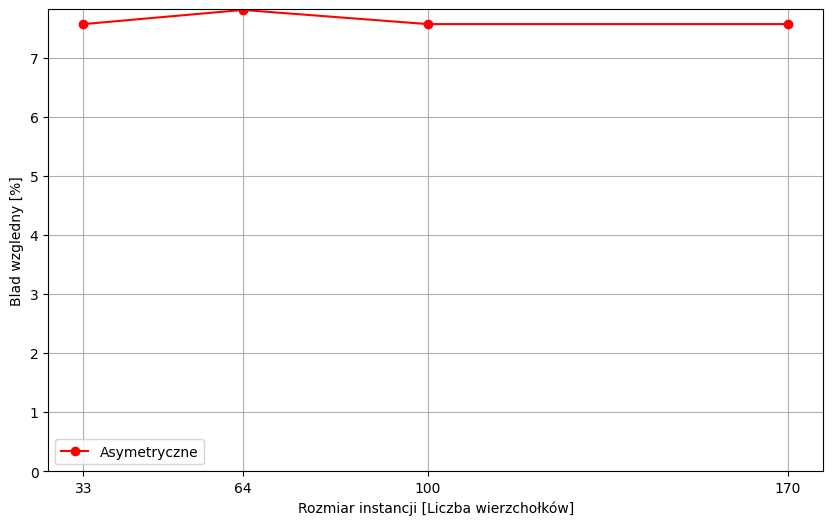

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.67 18.17 18.17 18.17         7.57 7.81 7.57 7.57
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       10.70 10.55 10.70 10.55         9.82   

                  
    64  100  170  
0 9.58 9.58 9.82  
[10.7 10.55 10.7 10.55]
[9.82 9.58 9.58 9.82]


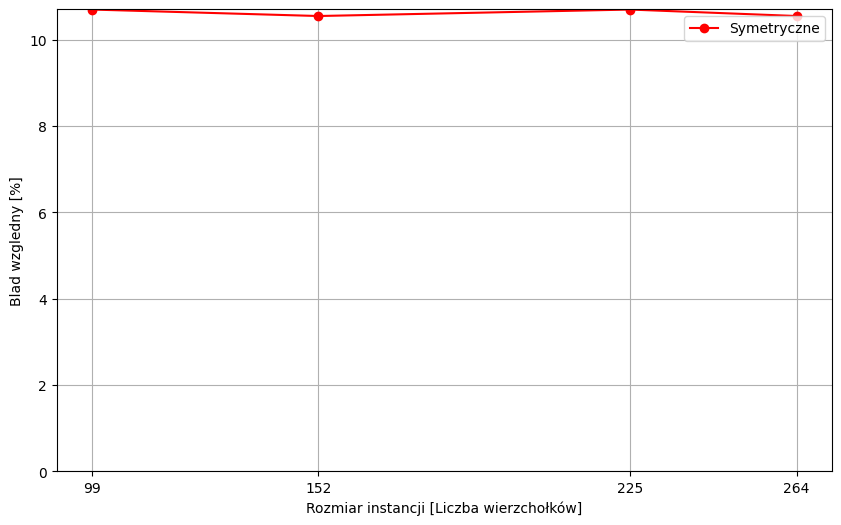

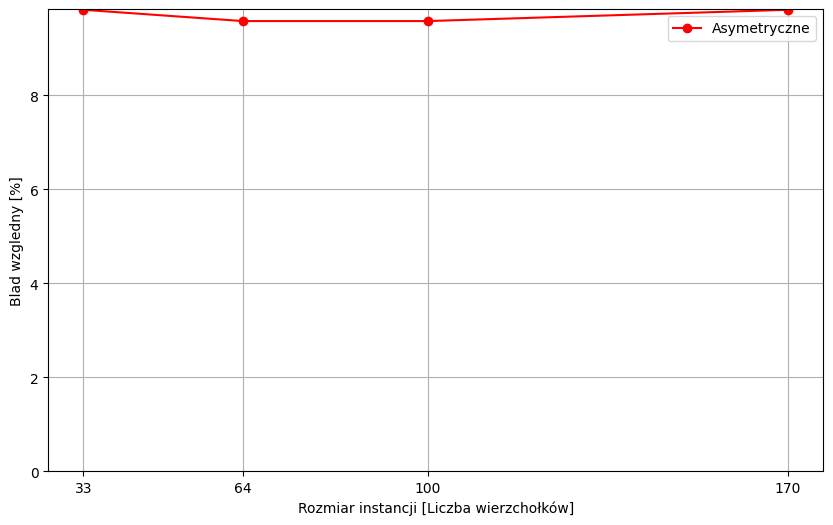

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       10.70 10.55 10.70 10.55         9.82 9.58 9.58 9.82
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       13.84 15.79 13.84 13.84        18.49   

                     
     64   100   170  
0 19.68 18.76 18.49  
[13.84 15.79 13.84 13.84]
[18.49 19.68 18.76 18.49]


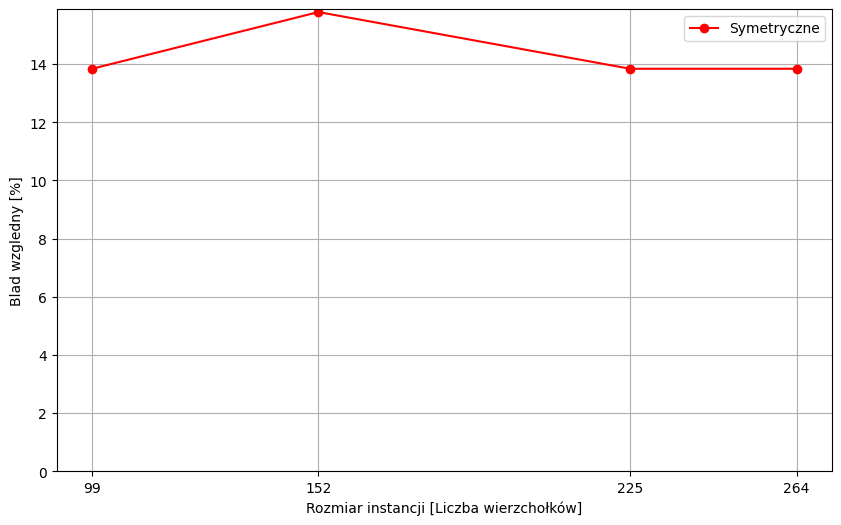

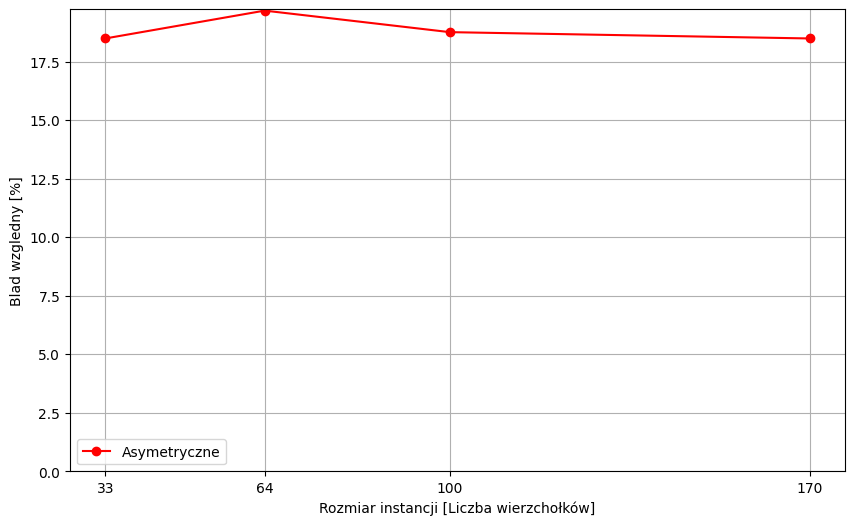

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       13.84 15.79 13.84 13.84        18.49 19.68 18.76 18.49
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       16.90 16.90 16.90 18.86        17.67   

                     
     64   100   170  
0 18.17 17.67 17.67  
[16.9 16.9 16.9 18.86]
[17.67 18.17 17.67 17.67]


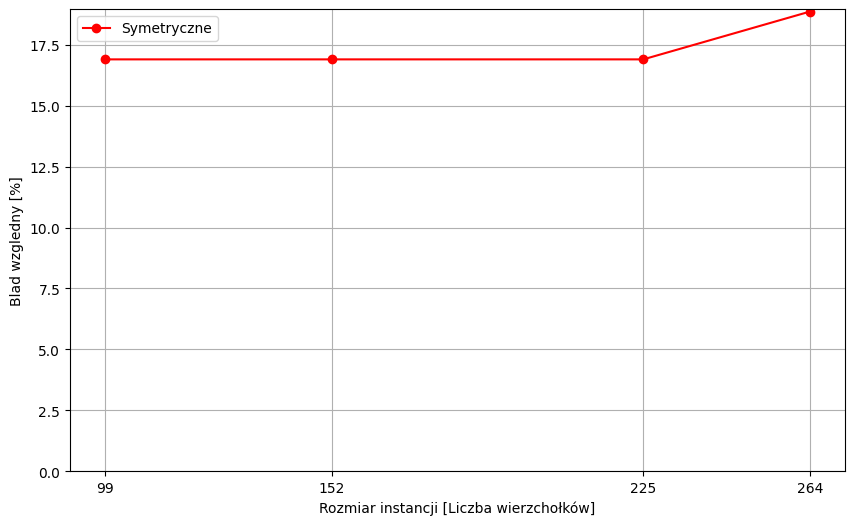

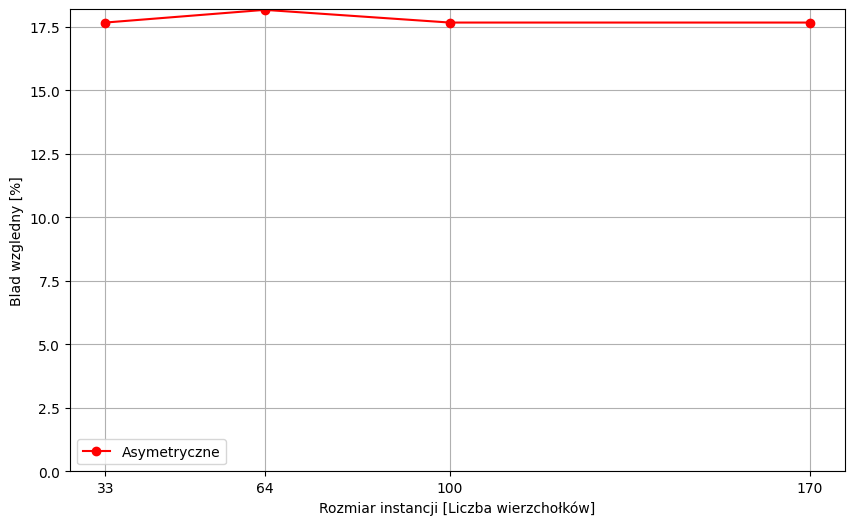

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       16.90 16.90 16.90 18.86        17.67 18.17 17.67 17.67
Error Table for TsTabuLen.csv:
                               Symetryczne                Asymetryczne        \
  Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   
0             Błąd wzgledny[%]        7.57 7.57 7.84 7.84        10.55 10.70   

               
    100   170  
0 10.70 10.70  
[7.57 7.57 7.84 7.84]
[10.55 10.7 10.7 10.7]


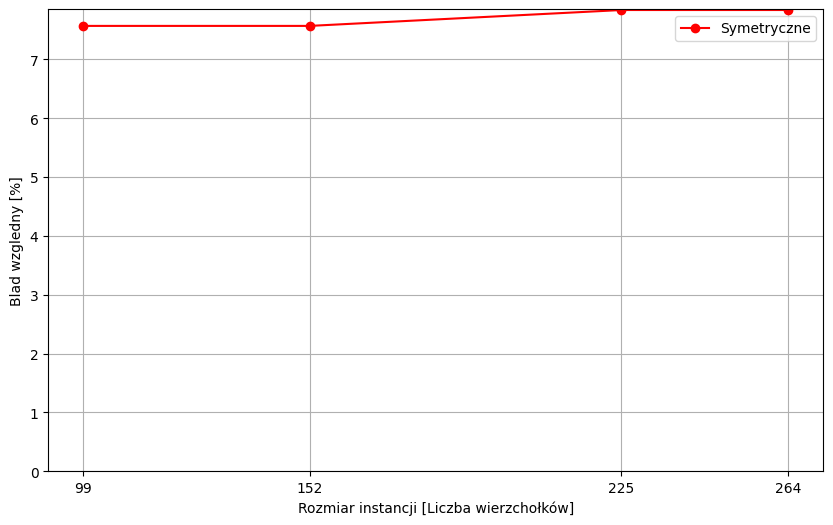

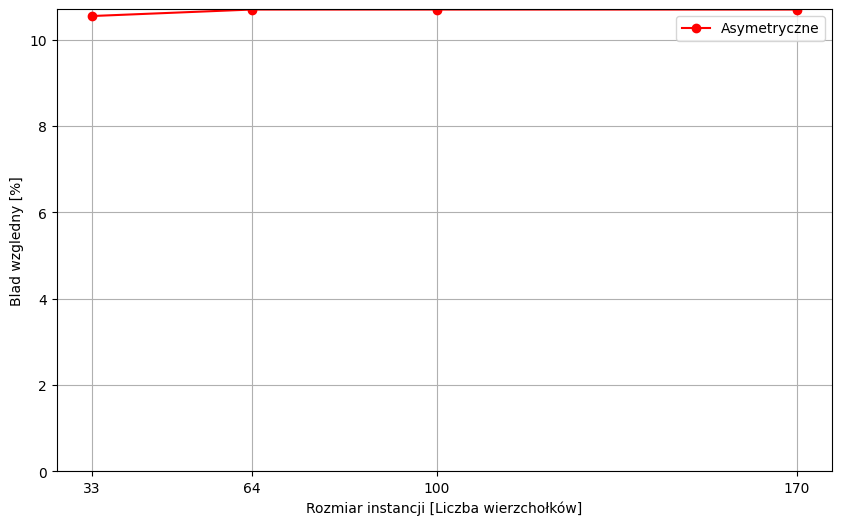

                             Symetryczne                Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   100   170
            Błąd wzgledny[%]        7.57 7.57 7.84 7.84        10.55 10.70 10.70 10.70
Error Table for TsTabuLen.csv:
                               Symetryczne                Asymetryczne        \
  Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   
0             Błąd wzgledny[%]        9.39 9.39 9.39 9.66        13.84 13.84   

               
    100   170  
0 12.21 13.84  
[9.39 9.39 9.39 9.66]
[13.84 13.84 12.21 13.84]


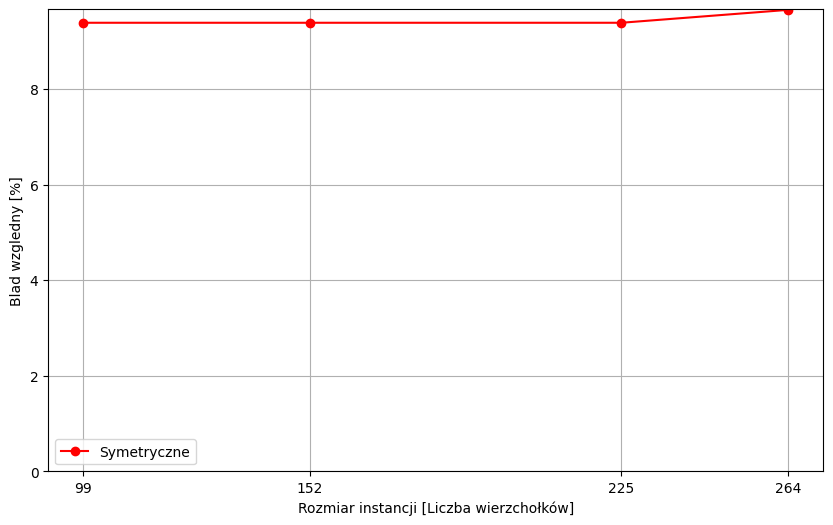

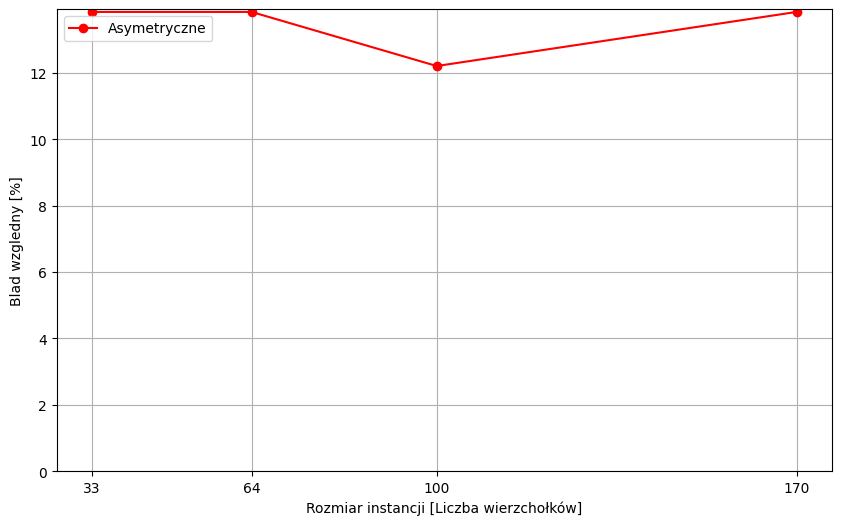

                             Symetryczne                Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   100   170
            Błąd wzgledny[%]        9.39 9.39 9.39 9.66        13.84 13.84 12.21 13.84
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       18.49 18.49 18.76 18.49        18.80   

                     
     64   100   170  
0 18.33 18.86 16.90  
[18.49 18.49 18.76 18.49]
[18.8 18.33 18.86 16.9]


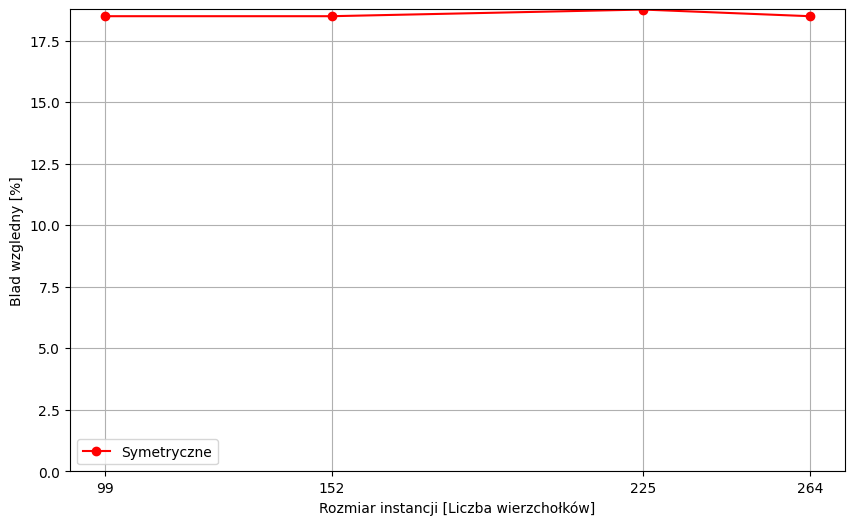

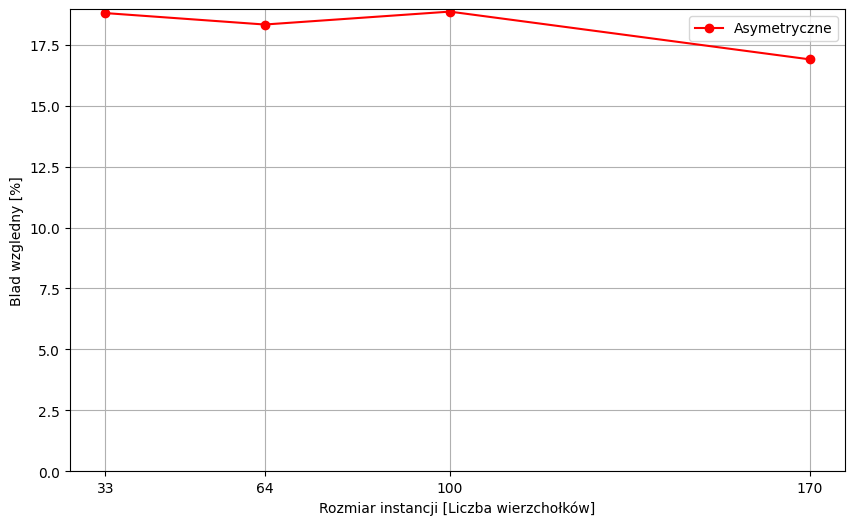

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       18.49 18.49 18.76 18.49        18.80 18.33 18.86 16.90
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       17.92 17.92 17.67 17.92         7.57   

                  
    64  100  170  
0 7.84 7.84 7.57  
[17.92 17.92 17.67 17.92]
[7.57 7.84 7.84 7.57]


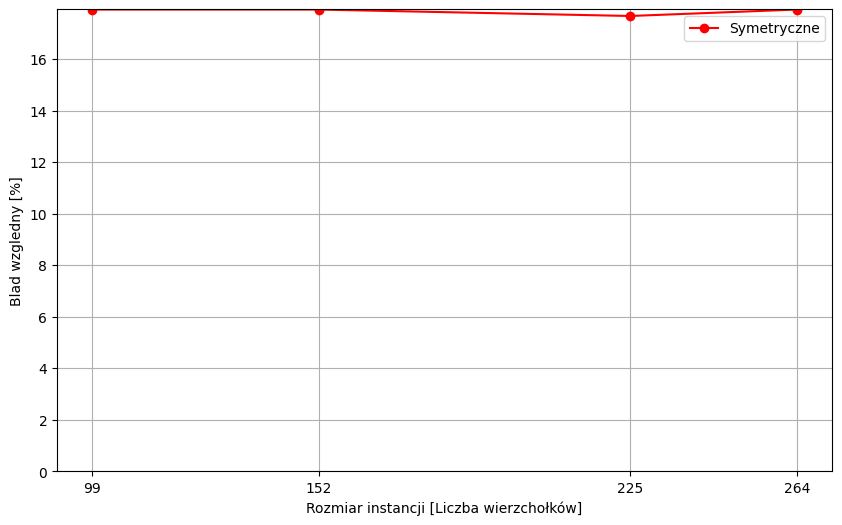

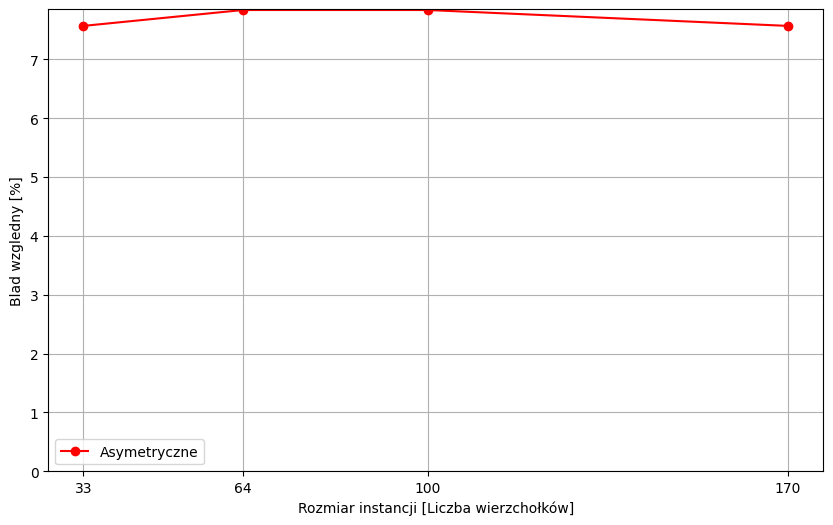

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.92 17.92 17.67 17.92         7.57 7.84 7.84 7.57
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       10.70 10.55 10.70 10.70         9.82   

                  
    64  100  170  
0 9.58 9.66 9.82  
[10.7 10.55 10.7 10.7]
[9.82 9.58 9.66 9.82]


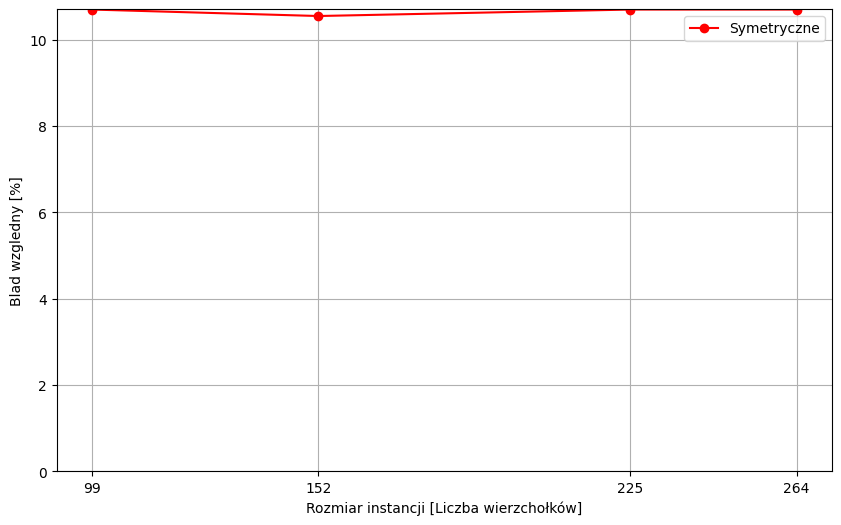

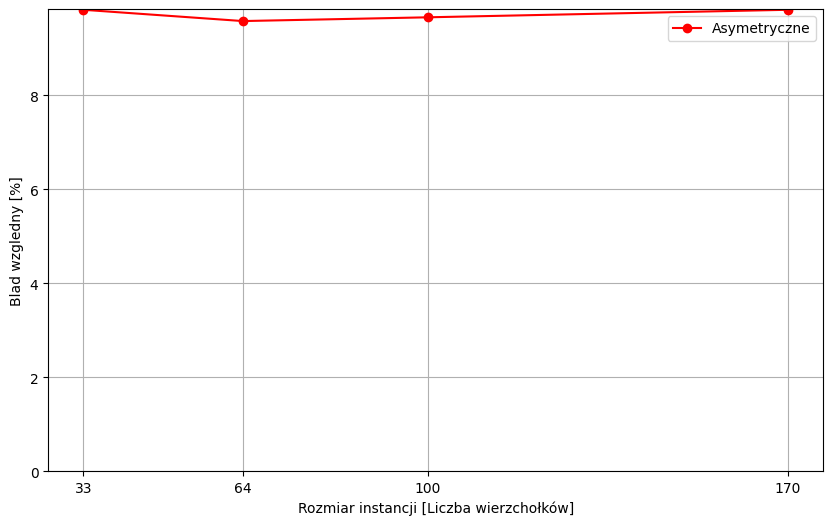

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       10.70 10.55 10.70 10.70         9.82 9.58 9.66 9.82
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       17.19 17.11 15.32 13.84        18.49   

                     
     64   100   170  
0 18.76 18.49 18.98  
[17.19 17.11 15.32 13.84]
[18.49 18.76 18.49 18.98]


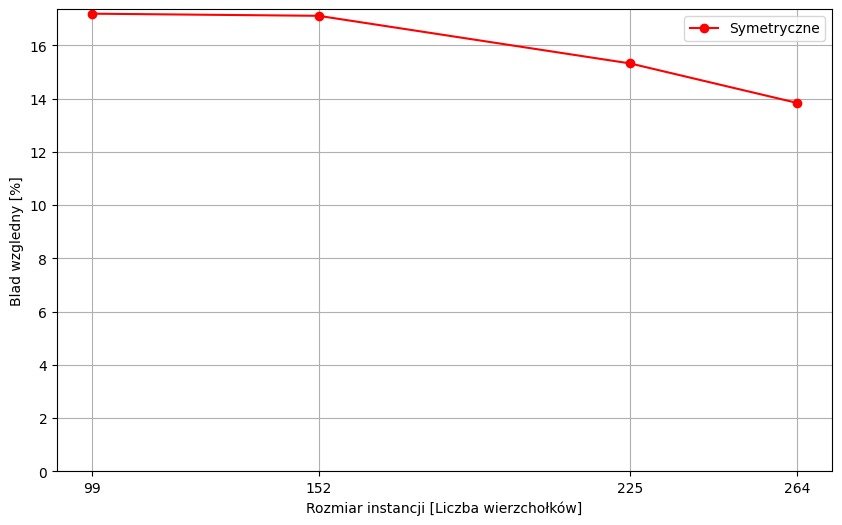

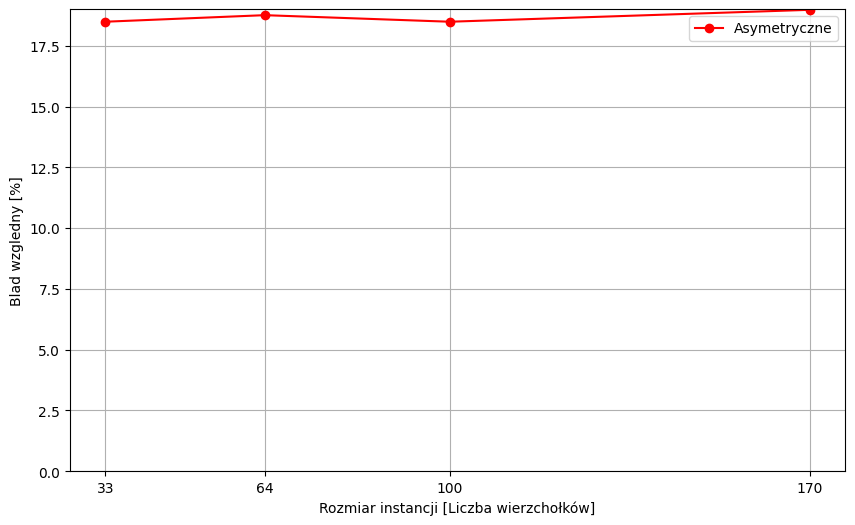

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       17.19 17.11 15.32 13.84        18.49 18.76 18.49 18.98
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       17.17 16.90 18.25 18.80        18.17   

                     
     64   100   170  
0 17.67 17.92 17.67  
[17.17 16.9 18.25 18.8]
[18.17 17.67 17.92 17.67]


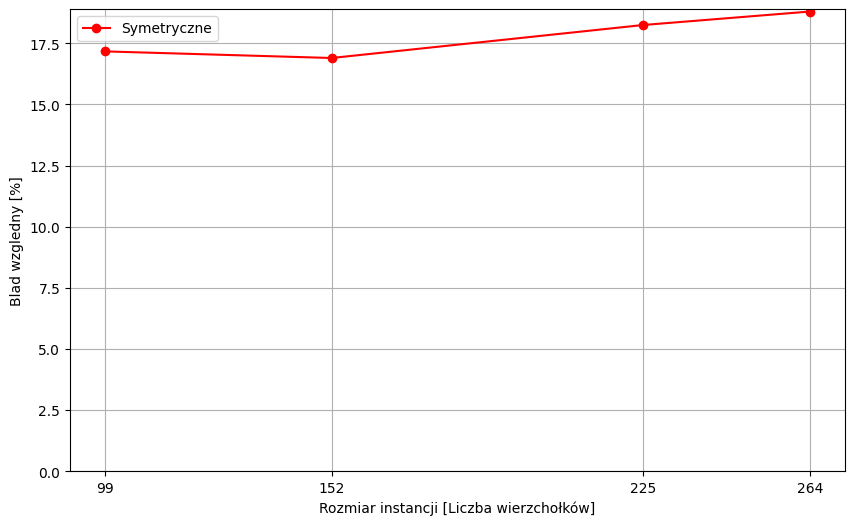

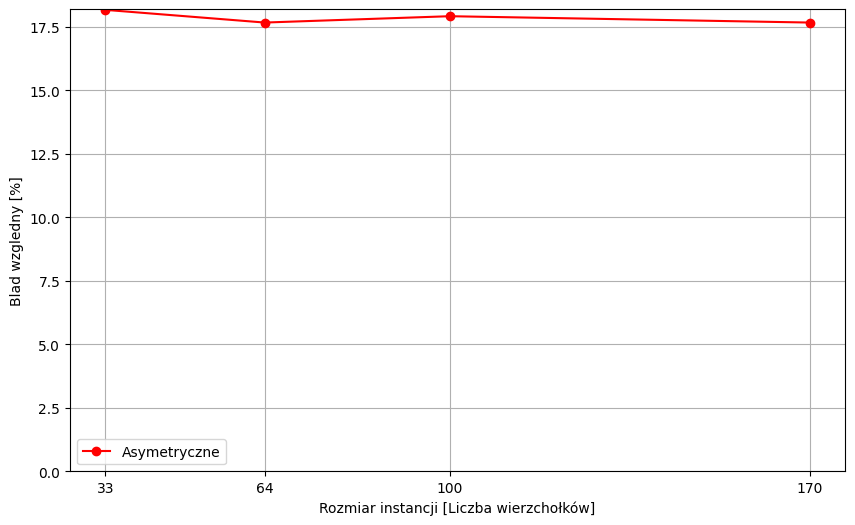

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       17.17 16.90 18.25 18.80        18.17 17.67 17.92 17.67
Error Table for TsTabuLen.csv:
                               Symetryczne                Asymetryczne        \
  Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   
0             Błąd wzgledny[%]        7.57 7.84 7.62 7.57        10.55 10.55   

               
    100   170  
0 10.55 10.83  
[7.57 7.84 7.62 7.57]
[10.55 10.55 10.55 10.83]


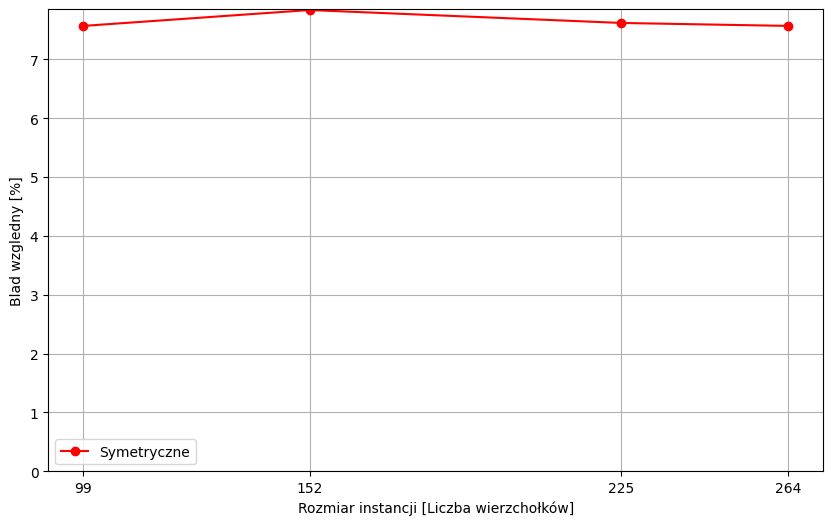

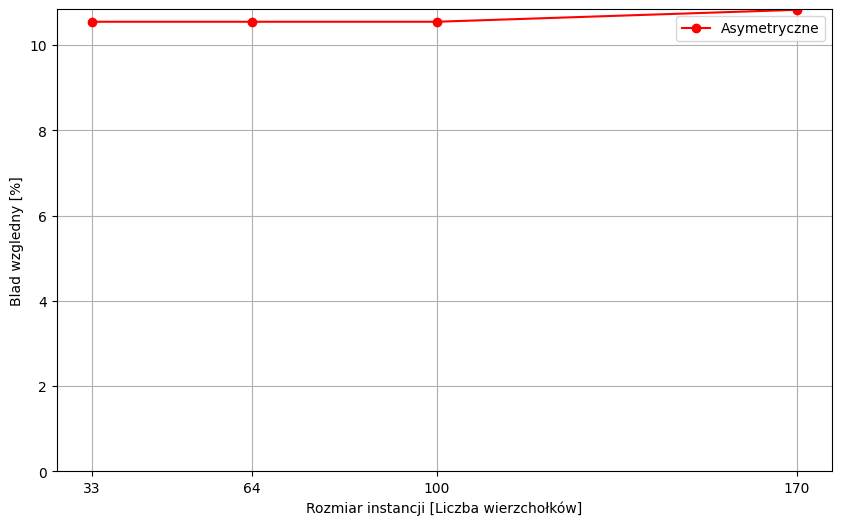

                             Symetryczne                Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99  152  225  264           33    64   100   170
            Błąd wzgledny[%]        7.57 7.84 7.62 7.57        10.55 10.55 10.55 10.83
Error Table for TsTabuLen.csv:
                               Symetryczne                 Asymetryczne        \
  Rozmiar[Liczba wierzchołków]          99   152  225  264           33    64   
0             Błąd wzgledny[%]        9.39 10.71 9.39 9.39        13.84 13.84   

               
    100   170  
0 13.84 15.79  
[9.39 10.71 9.39 9.39]
[13.84 13.84 13.84 15.79]


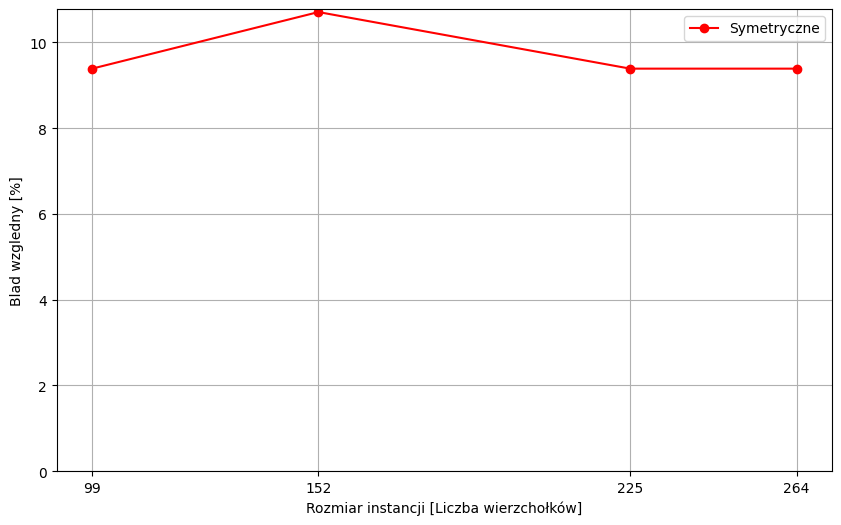

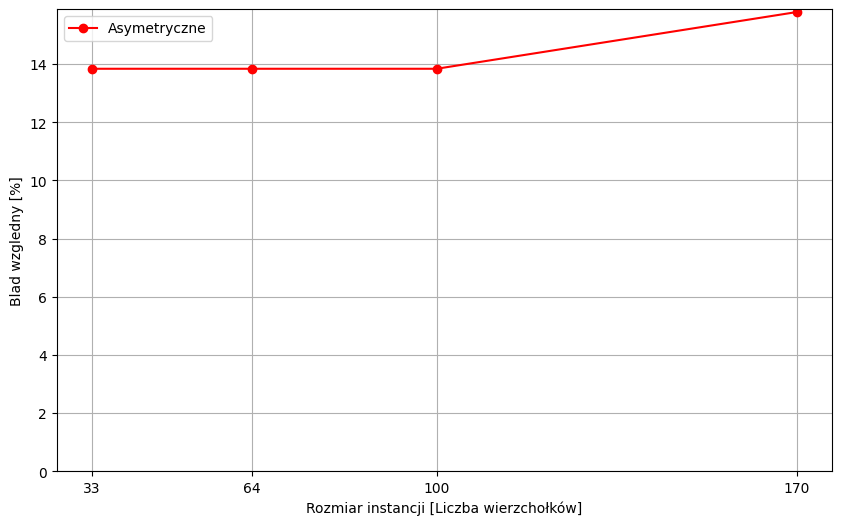

                             Symetryczne                 Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152  225  264           33    64   100   170
            Błąd wzgledny[%]        9.39 10.71 9.39 9.39        13.84 13.84 13.84 15.79
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       18.98 18.76 18.49 18.49        17.17   

                     
     64   100   170  
0 17.17 17.17 16.90  
[18.98 18.76 18.49 18.49]
[17.17 17.17 17.17 16.9]


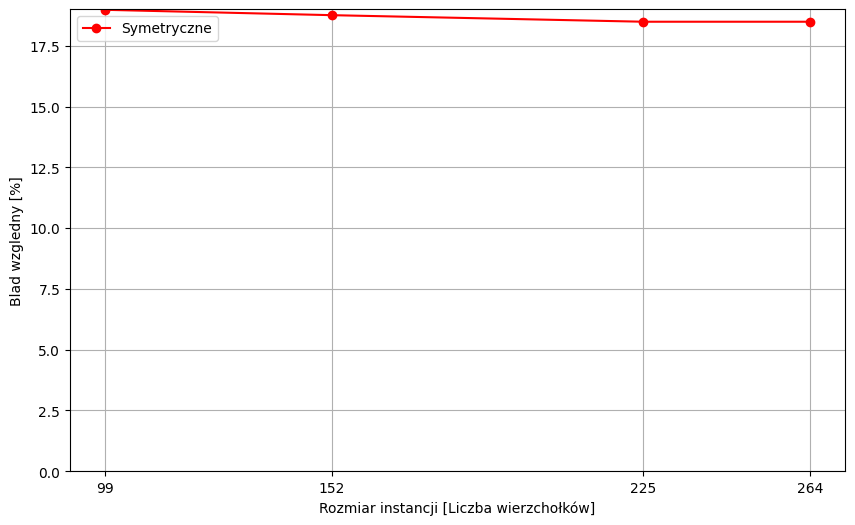

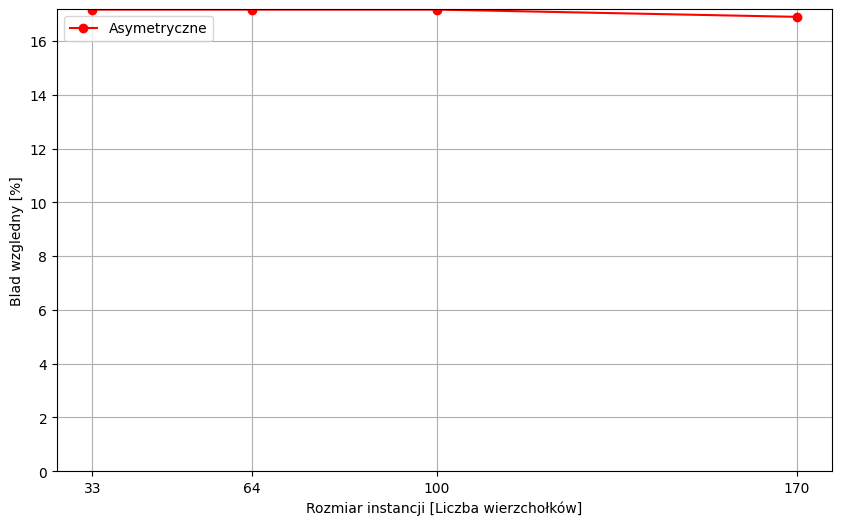

                             Symetryczne                   Asymetryczne                  
Rozmiar[Liczba wierzchołków]          99   152   225   264           33    64   100   170
            Błąd wzgledny[%]       18.98 18.76 18.49 18.49        17.17 17.17 17.17 16.90
Error Table for TsTabuLen.csv:
                               Symetryczne                   Asymetryczne  \
  Rozmiar[Liczba wierzchołków]          99   152   225   264           33   
0             Błąd wzgledny[%]       17.67 17.92 18.17 18.33         7.92   

                  
    64  100  170  
0 7.62 7.40 7.57  
[17.67 17.92 18.17 18.33]
[7.92 7.62 7.4 7.57]


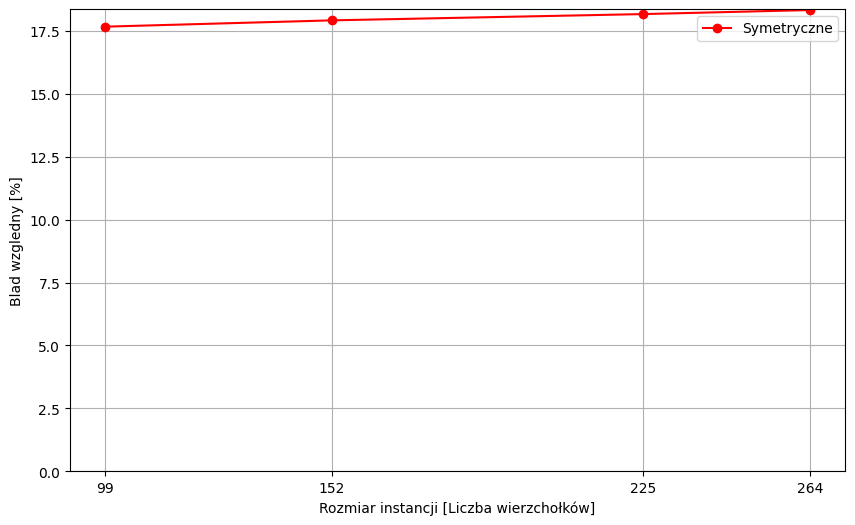

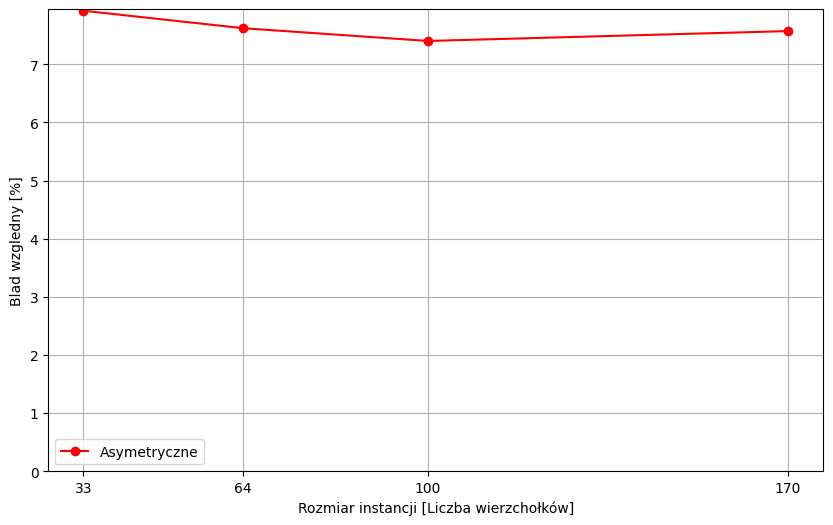

                             Symetryczne                   Asymetryczne               
Rozmiar[Liczba wierzchołków]          99   152   225   264           33   64  100  170
            Błąd wzgledny[%]       17.67 17.92 18.17 18.33         7.92 7.62 7.40 7.57


In [70]:
#Create Mean execute time tables
time_frames = {}
for file_name in file_list:
    data_frame = data_frames[file_name]
    print(file_name)
    print(len(data_frame))
    print(data_frame)
    file_name_no_ext = file_name.replace(".csv", "")
    with open(f"./src/tables/{file_name_no_ext}.tex", 'w') as file:
        pass
    err_table = base_table.copy()
    j = 0
    i = 0
    for start in range(0, len(data_frame), INSTANCES):
        end = start + INSTANCES
        selected_data = data_frame.iloc[start:end]
        average_error = selected_data["Blad wzgledny (procentowo)"].mean()
        err_table.at[i, column_list[j]] = round(average_error, 2)
        j += 1
        if j>7:
            j = 0
            i += 1
    pd.options.display.float_format = '{:.2f}'.format
    save_to_latex(err_table,file_name_no_ext+".tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych","error_"+file_name_no_ext)
    createPlot(err_table,file_name)
    print(err_table.to_string(index=False))

In [27]:
#Print whole csv
for name, df in data_frames.items():
    print(f"Data from {name}:")
    print(df.to_string())

Data from finalresoult.csv:
     Optymalny wynik Optymalna scieżka Otrzymany wynik        Otrzymana scieżka  Czas wykonania  Blad bezwzgledny  Blad wzgledny (liczbowo) Blad wzgledny (procentowo)
0   \Dane\Adam11.txt        tabuSearch           false                      NaN             NaN               NaN                       NaN                        NaN
1                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18244500.00              4.00                      0.03                  2.684564%
2                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     17726200.00              4.00                      0.03                  2.684564%
3                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18014500.00              4.00                      0.03                  2.684564%
4                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18187300.00              4.00                      0.